# Amaç
- Rastgele sağlık değerleri oluşturmak
- ODEV-> yeni sütunlar eklemek
- Bunları bir dataframe halinde birleştirmek
- yapay sinir ağı ile model eğitimi yapmak
- elde edilen modeli gorselleştirmek değerlendirmek

- EKLEMELER :EarlyStopping ile erken durdurma işlemi yapıldı overfitting durumunda ekstra çalışması engellendi
-----
# Purpose
- Generating random health values
- HOMEWORK-> adding new columns
- Combining them into a dataframe
- Training the model with an artificial neural network
- Visualizing and evaluating the obtained model

- ADDITIONS: Early stopping was done with EarlyStopping, extra work was prevented in case of overfitting


# Import Libraries

In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# Data Create

In [38]:
def assign_treatment_1(blood_pressure, blood_sugar, symptom):
   return (blood_pressure < 120) & (blood_sugar < 100) & (symptom <= 1)

def assign_treatment_2(blood_pressure, blood_sugar, symptom):
  return (blood_pressure > 120) & (blood_sugar < 140) & (1<symptom <= 4)

def assign_treatment_3(blood_pressure, blood_sugar, symptom):
  return (blood_pressure > 140) & (blood_sugar >= 100) & (symptom > 4)

num_samples = 1000

# Mevcut sütunlar
age = np.random.randint(20, 80, size=num_samples)
gender = np.random.randint(0, 2, size=num_samples)
disease = np.random.randint(0, 4, size=num_samples)
symptom_fever = np.random.randint(0, 3, size=num_samples)
symptom_cough = np.random.randint(0, 3, size=num_samples)
symptom_headache = np.random.randint(0, 3, size=num_samples)
blood_pressure = np.random.randint(90, 180, size=num_samples)
blood_sugar = np.random.randint(70, 200, size=num_samples)
previous_treatment_response = np.random.randint(0, 3, size=num_samples)

# Yeni Sütunlar ~~ ODEV
bmi = np.round(np.random.uniform(18.5, 35.0, size=num_samples), 1)  # Vücut Kitle İndeksi
heart_rate = np.random.randint(60, 120, size=num_samples)  # Nabız
cholesterol = np.random.randint(150, 280, size=num_samples)  # Kolesterol Seviyesi
smoking_status = np.random.randint(0, 2, size=num_samples)  # Sigara içme durumu

# Belirtiler toplamı
symptom = symptom_fever + symptom_cough + symptom_headache

In [39]:
treatment_plan=np.zeros(num_samples)

for i in range(num_samples):
  if assign_treatment_1(blood_pressure[i], blood_sugar[i], symptom[i]):
    treatment_plan[i]=0
  elif assign_treatment_2(blood_pressure[i], blood_sugar[i], symptom[i]):
    treatment_plan[i]=1
  else :
    treatment_plan[i]=2


In [40]:
# DataFrame oluşturma

df = pd.DataFrame({
    "Age": age,
    "Gender": gender,
    "Disease": disease,
    "Symptom_Fever": symptom_fever,
    "Symptom_Cough": symptom_cough,
    "Symptom_Headache": symptom_headache,
    "Total_Symptoms": symptom,
    "Blood_Pressure": blood_pressure,
    "Blood_Sugar": blood_sugar,
    "Previous_Treatment_Response": previous_treatment_response,
    "BMI": bmi,
    "Heart_Rate": heart_rate,
    "Cholesterol": cholesterol,
    "Smoking_Status": smoking_status
})

In [41]:
df.head()

,Age,Gender,Disease,Symptom_Fever,Symptom_Cough,Symptom_Headache,Total_Symptoms,Blood_Pressure,Blood_Sugar,Previous_Treatment_Response,BMI,Heart_Rate,Cholesterol,Smoking_Status
0,45,1,0,1,0,2,3,173,100,1,21.4,80,153,0
1,22,1,2,1,0,0,1,166,110,0,23.4,78,232,0
2,47,0,3,1,2,2,5,130,108,1,23.3,114,176,0
3,73,0,0,2,1,2,5,176,195,0,20.8,111,249,0
4,27,1,0,0,0,2,2,147,177,1,23.8,92,181,0


# Traning :DL -ANN

In [35]:
x=data.drop("treatment_plan",axis=1)
y=to_categorical(data["treatment_plan"],num_classes=3)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [48]:
model=Sequential([
    Dense(32,activation="relu",input_shape=(x_train.shape[1],)),
    Dense(64,activation="relu"),
    Dense(64,activation="relu"),
    Dense(3,activation="softmax")
])

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=150,batch_size=32,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3577 - loss: 10.4080 - val_accuracy: 0.6300 - val_loss: 1.1716
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7405 - loss: 0.9090 - val_accuracy: 0.8150 - val_loss: 0.5225
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7913 - loss: 0.5427 - val_accuracy: 0.7650 - val_loss: 0.5120
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8233 - loss: 0.4386 - val_accuracy: 0.8200 - val_loss: 0.4305
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7855 - loss: 0.4219 - val_accuracy: 0.7650 - val_loss: 0.4437
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7947 - loss: 0.4475 - val_accuracy: 0.7900 - val_loss: 0.4131
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8016 - loss: 0.4042 - val_accuracy: 0.7650 - val_loss: 0.4486
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7968 - loss: 0.3960 - val_accuracy: 0.7850 - val_loss: 0

# Evaluation

## with EarlyStopping - CallBack

In [49]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation accuracy: (val_accuracy), validation loss: {val_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8225 - loss: 0.3766 
Validation accuracy: (val_accuracy), validation loss: 0.39802390336990356


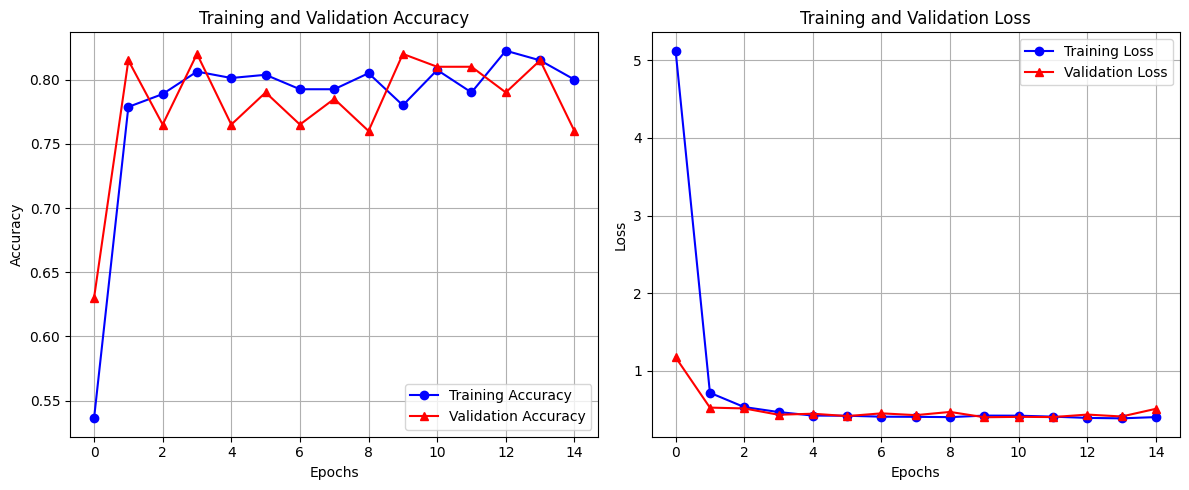

In [50]:
epochs=range(1,len(history.history["accuracy"])+1)
hist=history.history

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist["accuracy"],"bo-",label="Training Accuracy")
plt.plot(hist["val_accuracy"],"r^-",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.plot(hist["loss"],"bo-",label="Training Loss")
plt.plot(hist["val_loss"],"r^-",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## without EarlyStopping

In [52]:
history2=model.fit(x_train,y_train,epochs=150,batch_size=32,validation_data=(x_test,y_test))


Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7845 - loss: 0.4508 - val_accuracy: 0.7800 - val_loss: 0.4325
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.3802 - val_accuracy: 0.7950 - val_loss: 0.4264
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8166 - loss: 0.3918 - val_accuracy: 0.7700 - val_loss: 0.4488
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8099 - loss: 0.3927 - val_accuracy: 0.8150 - val_loss: 0.3984
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7612 - loss: 0.4441 - val_accuracy: 0.7800 - val_loss: 0.4469
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8184 - loss: 0.3840 - val_accuracy: 0.7600 - val_loss: 0.4269
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7802 - loss: 0.4163 - val_accuracy: 0.8100 - val_loss: 0.4185
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7864 - loss: 0.4049 - val_accuracy: 0.7700 - v

In [53]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation accuracy: (val_accuracy), validation loss: {val_loss}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8947 - loss: 0.2703 
Validation accuracy: (val_accuracy), validation loss: 0.286650151014328


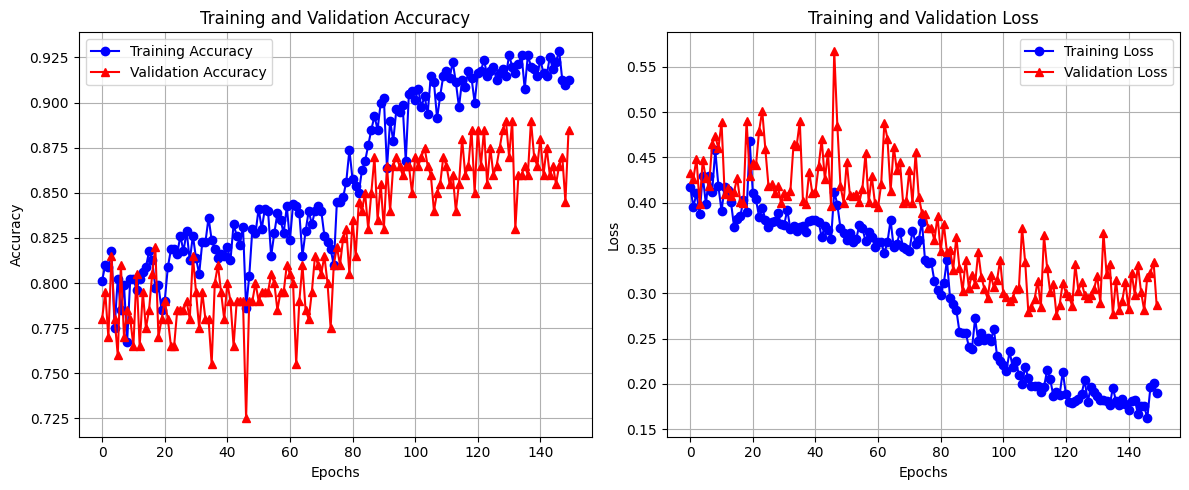

In [54]:
hist=history2.history

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist["accuracy"],"bo-",label="Training Accuracy")
plt.plot(hist["val_accuracy"],"r^-",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()


plt.subplot(1,2,2)
plt.plot(hist["loss"],"bo-",label="Training Loss")
plt.plot(hist["val_loss"],"r^-",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()